In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing
1. Fill na with zero for all rows of Returns
2. Remove duplicated columns
3. Check whether a customer has only unique churn values
4. Transfer data type to suitable one for each column

In [2]:
file_path = "../data/raw/ecommerce_customer_data_large.csv"
df = pd.read_csv(file_path)
# to see if there are any missing values
print("data shape: ", df.shape)
print(df.isnull().sum())
print('\nData types of each column:')
print(df.dtypes)

data shape:  (250000, 13)
Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

Data types of each column:
Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object


In [ ]:
# fill missing values in "Returns" column with 0 and convert 'Customer Age' and 'Age' to integers
df["Returns"] = df["Returns"].fillna(0)
df['Customer Age'] = df['Customer Age'].astype(int)
df['Age'] = df['Age'].astype(int)
if df[df['Customer Age'] != df['Age']].empty:  # True
    # drop the 'Customer Age' column as it is redundant
    print("Customer Age and Age columns are identical. Dropping 'Customer Age' column.")
    df.drop(columns=['Customer Age'], inplace=True)

In [ ]:
# Data Quality Checks: Whether a customer has only unique churn values?
unique_churn = df.groupby('Customer ID')['Churn'].nunique()
multiple_churn = unique_churn[unique_churn > 1]
print(multiple_churn.empty)  # Should print True if no customer has multiple churn values

True


In [ ]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Customer Name'] = df['Customer Name'].astype(str)

# Convert categorical columns to 'category' dtype
categorical_cols = ['Product Category', 'Payment Method', 'Gender', 'Returns', 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Ensure integer columns are int64
int_cols = ['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Age']
for col in int_cols:
    df[col] = df[col].astype('int64')

print(df.dtypes)
df.head()

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category               category
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                 category
Returns                        category
Customer Name                    object
Age                               int64
Gender                         category
Churn                          category
dtype: object


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,John Rivera,31,Female,0


In [ ]:
df.to_csv("../data/processed/ecommerce_customer_data_cleaned.csv", index=False)

## [EDA] Decriptive Statistics
Throught the reasons below, it is inferred that the data is artificially generated and does not represent real-world data.
- There are not siginificant correlation between all variables. At least the Price and Quantity would have some correlation.
- The frequency of total purchase amount is nealy to be uniformly distributed.
- The total purchase amounts of 4 various product categories are nealy the same

Even though the data is not real, we can still perform some basic analysis for hands-on practice.

In [8]:
df.describe(include='all')

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
count,250000.000000,250000,250000,250000.000000,250000.000000,250000.000000,250000,250000.000000,250000.000000,250000,250000.000000,250000,250000.00000
unique,NaN,249728,4,NaN,NaN,NaN,3,NaN,NaN,39878,NaN,2,NaN
top,NaN,2020-10-16 09:27:42,Electronics,NaN,NaN,NaN,Credit Card,NaN,NaN,Michael Johnson,NaN,Male,NaN
freq,NaN,2,62630,NaN,NaN,NaN,83547,NaN,NaN,119,NaN,125676,NaN
mean,25017.632092,NaN,NaN,254.742724,3.004936,2725.385196,NaN,43.798276,0.405904,NaN,43.798276,NaN,0.20052
std,14412.515718,NaN,NaN,141.738104,1.414737,1442.576095,NaN,15.364915,0.491067,NaN,15.364915,NaN,0.40039
min,1.000000,NaN,NaN,10.000000,1.000000,100.000000,NaN,18.000000,0.000000,NaN,18.000000,NaN,0.00000
25%,12590.000000,NaN,NaN,132.000000,2.000000,1476.000000,NaN,30.000000,0.000000,NaN,30.000000,NaN,0.00000
50%,25011.000000,NaN,NaN,255.000000,3.000000,2725.000000,NaN,44.000000,0.000000,NaN,44.000000,NaN,0.00000
75%,37441.250000,NaN,NaN,377.000000,4.000000,3975.000000,NaN,57.000000,1.000000,NaN,57.000000,NaN,0.00000


In [9]:
# correlation matrix
df_numeric = df[['Product Price', 'Quantity', 'Total Purchase Amount', 'Age', 'Churn', 'Returns']]
df_numeric['Churn'] = df_numeric['Churn'].astype(int)  # Convert 'Churn' to int for correlation
df_numeric['Returns'] = df_numeric['Returns'].astype(int)  # Convert 'Returns' to int for correlation
# categorical to dummy variables
dummies = pd.get_dummies(df[['Product Category', 'Payment Method', 'Gender']], columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)
df_numeric = pd.concat([df_numeric, dummies], axis=1)
save_path = "../data/processed/ecommerce_customer_data_large_numeric.csv"
df_numeric.to_csv(save_path, index=False)

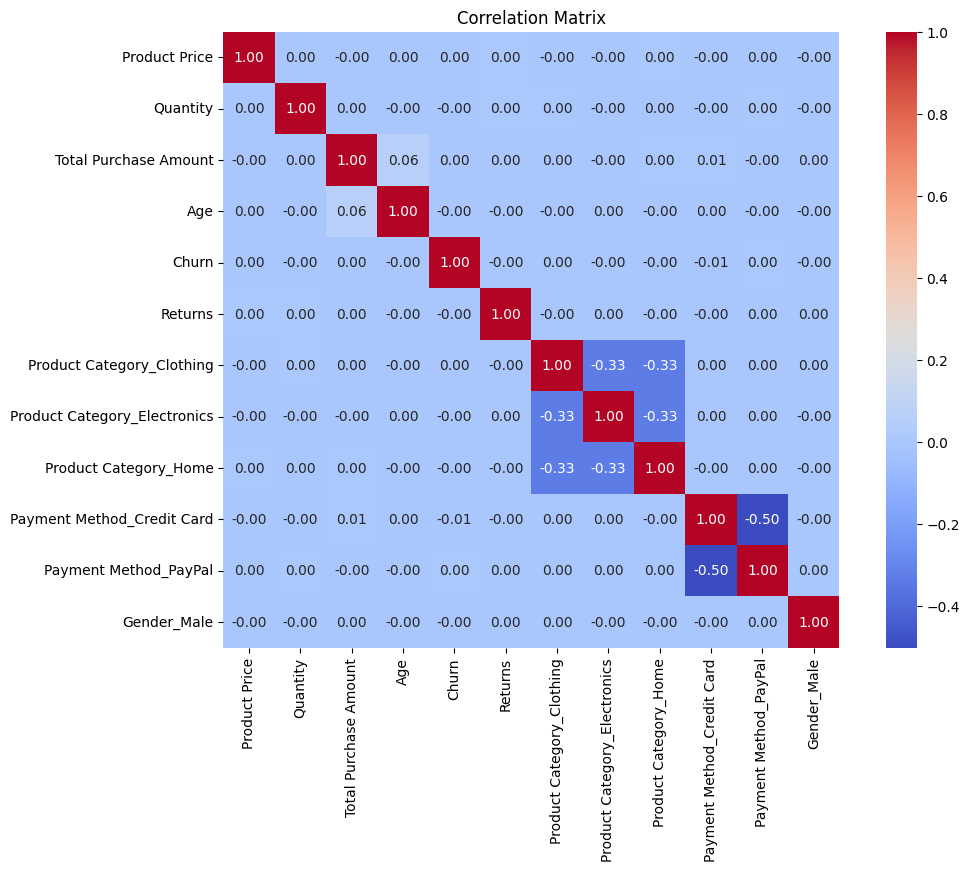

In [10]:
plt.figure(figsize=(12, 8))
cor_map = df_numeric.corr()
sns.heatmap(cor_map, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
# it seems that there are no strong correlations between the numeric variables.


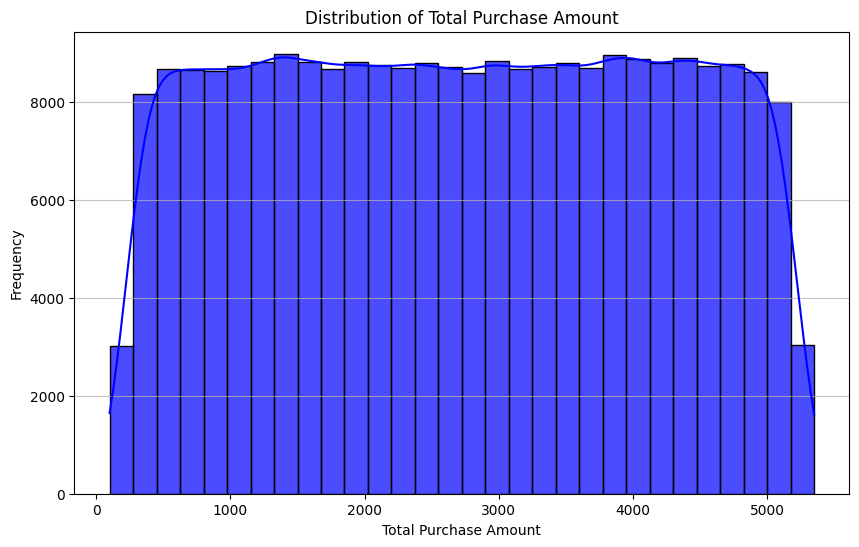

In [11]:
# to see the distribution of 'Total Purchase Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Purchase Amount'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
# Which product categories generate the highest total purchase amounts?
product_category_totals = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
product_category_totals
# That is, customers who purchase "Home" tend to spend the most.

Product Category
Home           171138916
Clothing       170716122
Electronics    170146025
Books          169345236
Name: Total Purchase Amount, dtype: int64